## Exercise 1  
1. Создайте график $x^2⋅sin(1/x^2)+x$ на интервале $[−1,1]$, используя 250 точек. Не забудьте пометить оси!
2. Создайте semilogy график (с логарифмической шкалой для оси y и линейной шкалой для оси x) относительной разницы  функций $1/(1+x^2)$ и $1/x^2$ на интервале $[5,25]$. (Относительная разница чисел $a$ и $b$ определяется как $|1−a/b|$)
3. В Scipy также есть много менее распространенных специальных функций. Взгляните на обширный список <a href=https://docs.scipy.org/doc/scipy/reference/special.html> здесь</a>! Выберите несколько интересных спец функций, которые вы знаете (или, может быть, не знаете), подставьте несколько чисел и начертите их.


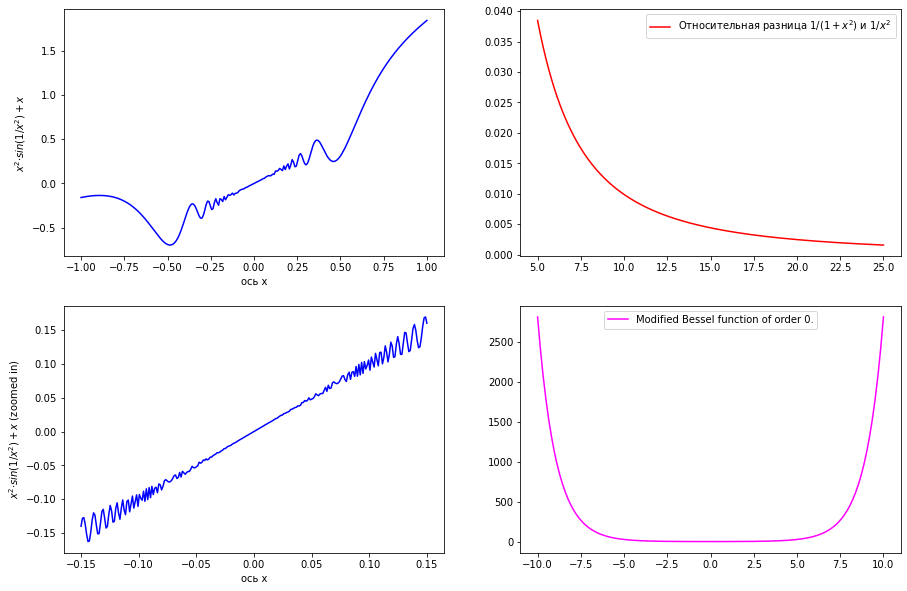

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scipy.special as sp

def f1(x):
    return x ** 2 * np.sin(1 / x ** 2) + x
def f2(x):
    return 1 - (1/(1 + x ** 2)) / (1 / x ** 2)
xx = np.linspace(-1, 1, 250)
yy = f1(xx)

fig, ax = plt.subplots(2, 2, figsize=(15, 10))
ax[0, 0].plot(xx, yy, color='blue')
ax[0, 0].set_xlabel('ось х')
ax[0, 0].set_ylabel('$x^2⋅sin(1/x^2)+x$')

xx = np.linspace(5, 25, 250)
yy = f2(xx)
ax[0, 1].plot(xx, yy, label='Относительная разница $1/(1+x^2)$ и $1/x^2$', color='red')
ax[0, 1].legend()

xx = np.linspace(-0.15, 0.15, 250)
yy = f1(xx)
ax[1, 0].plot(xx, yy, color='blue')
ax[1, 0].set_xlabel('ось х')
ax[1, 0].set_ylabel('$x^2⋅sin(1/x^2)+x$ (zoomed in)')
xx = np.linspace(-10, 10, 250)
yy = sp.i0(xx)
ax[1, 1].plot(xx, yy, label='Modified Bessel function of order 0.', color='magenta')
ax[1, 1].legend()

## Exercise 2  
1. Построить график функции $sin(x)/x$ на отрезке $[-6\pi;6\pi]$ и добавить тики по оси $x$ с шагом $\pi/2$ от $-6\pi$ до $6\pi$, причём обозначения тиков должны содержать греческую букву $\pi$. Добавить сетку на график.

([<matplotlib.axis.XTick at 0x1d7e576e4f0>,
 [Text(-18.84955592153876, 0, '-6.0 $\\pi$'),
  Text(-17.27875959474386, 0, '-5.5 $\\pi$'),
  Text(-15.707963267948962, 0, '-5.0 $\\pi$'),
  Text(-14.137166941154064, 0, '-4.5 $\\pi$'),
  Text(-12.566370614359165, 0, '-4.0 $\\pi$'),
  Text(-10.995574287564267, 0, '-3.5 $\\pi$'),
  Text(-9.424777960769369, 0, '-3.0 $\\pi$'),
  Text(-7.85398163397447, 0, '-2.5 $\\pi$'),
  Text(-6.283185307179572, 0, '-2.0 $\\pi$'),
  Text(-4.712388980384674, 0, '-1.5 $\\pi$'),
  Text(-3.1415926535897754, 0, '-1.0 $\\pi$'),
  Text(-1.570796326794877, 0, '-0.5 $\\pi$'),
  Text(2.1316282072803006e-14, 0, '0.0 $\\pi$'),
  Text(1.5707963267949197, 0, '0.5 $\\pi$'),
  Text(3.141592653589818, 0, '1.0 $\\pi$'),
  Text(4.712388980384716, 0, '1.5 $\\pi$'),
  Text(6.283185307179615, 0, '2.0 $\\pi$'),
  Text(7.853981633974513, 0, '2.5 $\\pi$'),
  Text(9.424777960769411, 0, '3.0 $\\pi$'),
  Text(10.99557428756431, 0, '3.5 $\\pi$'),
  Text(12.566370614359208, 0, '4.0 $\\pi$'

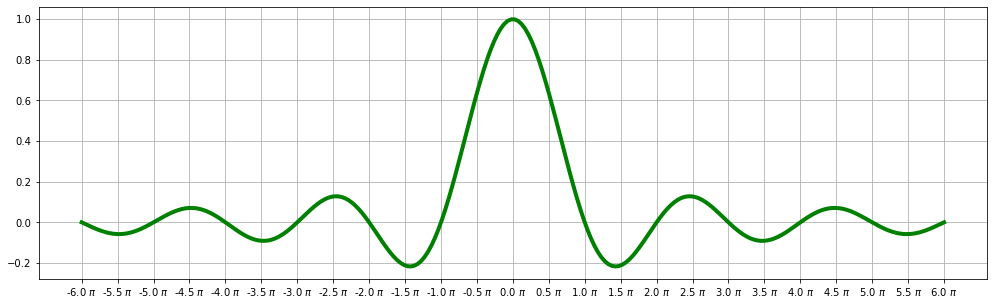

In [2]:
def f(x):
    return np.sin(x) / x

plt.figure(figsize=(17, 5))
xx = np.linspace(-np.pi * 6, np.pi * 6, 250)
yy = f(xx)
plt.plot(xx, yy, color='green', linewidth=4)
plt.grid()
plt.xticks(np.arange(-np.pi * 6, np.pi * 6 + 1, np.pi / 2), [str((i / 2)) + ' $\pi$' for i in range(-12, 13)])


## Exercise 3  
1. Создайте цветовой график $sin(x)sin(y)$ на интервале $[−π,π]×[−π,π]$.
2. Создайте цветовой график $e^{-x^2-y^2}$ на интервале $[−3,3]×[−3,3]$.

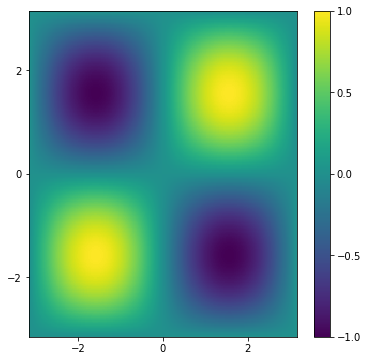

In [3]:
x = np.linspace(-np.pi, np.pi, 250)
y = np.linspace(-np.pi, np.pi, 250)
X, Y = np.meshgrid(x, y)
Z = np.sin(X) * np.sin(Y)

fig, ax = plt.subplots(figsize=(6,6))
norm = mpl.colors.Normalize(-abs(Z).max(), abs(Z).max())

p = ax.pcolor(X, Y, Z, norm = norm, cmap=mpl.cm.viridis)
ax.axis('tight')
ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(4))
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(4))

cb = fig.colorbar(p, ax=ax)
cb.set_ticks([-1, -.5, 0, .5, 1])

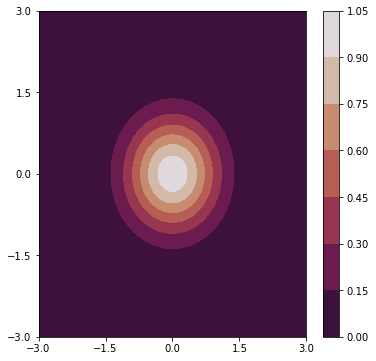

In [4]:
x = np.linspace(-3, 3, 250)
y = np.linspace(-3, 3, 250)
X, Y = np.meshgrid(x, y)
Z = np.exp(-X ** 2) / np.exp(Y ** 2)

fig, ax = plt.subplots(figsize=(6,6))
norm = mpl.colors.Normalize(-abs(Z).max(), abs(Z).max())

p = ax.contourf(X, Y, Z, norm = norm, cmap=mpl.cm.twilight)
ax.axis('tight')
ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(4))
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(4))

cb = fig.colorbar(p, ax=ax)